# Regression

We will learn Regression alhorithms in depth in this notebook.

In [98]:
import pandas as pd
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_excel("cars.xls")

### EDA- Exploratory Data Analysis

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.shape

(804, 12)

In [6]:
len(df)

804

In [8]:
df.sample(3)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
99,28040.128529,27484,Cadillac,CTS,Sedan 4D,Sedan,6,2.8,4,1,1,1
20,22358.877678,8970,Buick,Lacrosse,CXL Sedan 4D,Sedan,6,3.6,4,1,1,0
729,24405.066760,31344,SAAB,9_5 HO,Aero Sedan 4D,Sedan,4,2.3,4,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [9]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [11]:
df.corr(numeric_only=True)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [12]:
import seaborn as sns

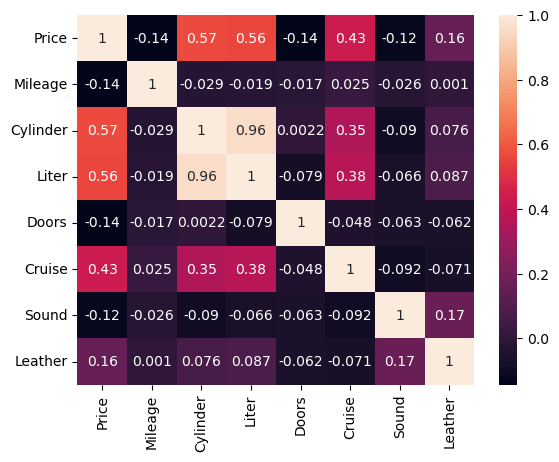

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [ ]:
# outlier formula---- ort+-3*std


In [17]:
df["Price"].mean(), df["Price"].median(), df["Price"].std(), df["Price"].max(), df["Price"].min()

(21343.143767325837,
 18024.995019071903,
 9884.852800898007,
 70755.46671654288,
 8638.930895260657)

In [21]:
outlier_up= df["Price"].mean() + 3*df["Price"].std()

outlier_down= df["Price"].mean() - 3*df["Price"].std()

print(f"OUTLIERS UP: {outlier_up} and OUTLIERS DOWN: {outlier_down}")

OUTLIERS UP: 50997.70217001985 and OUTLIERS DOWN: -8311.414635368183


In [18]:
df.tail()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0


In [22]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [23]:
df["Make"].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [25]:
df["Make"].nunique()

6

In [24]:
df["Make"].value_counts()

Make
Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: count, dtype: int64

In [26]:
df["Model"].value_counts(normalize=True)

Model
Malibu         0.074627
AVEO           0.074627
Cavalier       0.074627
Ion            0.062189
Cobalt         0.062189
9_3 HO         0.049751
Vibe           0.037313
Bonneville     0.037313
Monte Carlo    0.037313
Lacrosse       0.037313
Impala         0.037313
Grand Prix     0.037313
9_5            0.037313
Deville        0.037313
Lesabre        0.024876
Corvette       0.024876
9_3            0.024876
9_5 HO         0.024876
G6             0.024876
Grand Am       0.024876
Park Avenue    0.024876
Sunfire        0.012438
Century        0.012438
GTO            0.012438
Classic        0.012438
XLR-V8         0.012438
STS-V8         0.012438
STS-V6         0.012438
CTS            0.012438
CST-V          0.012438
L Series       0.012438
9-2X AWD       0.004975
Name: proportion, dtype: float64

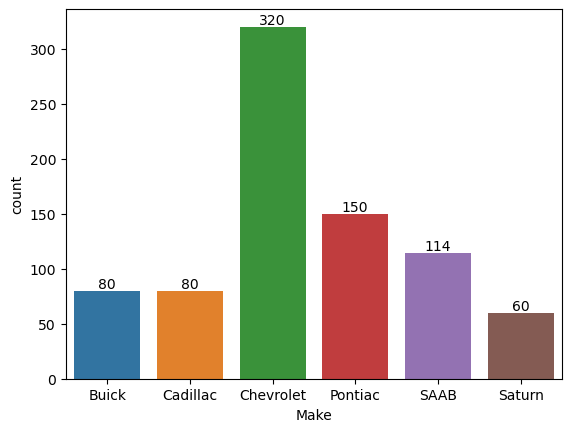

In [29]:
ax = sns.countplot(x=df["Make"]);
ax.bar_label(ax.containers[0]);

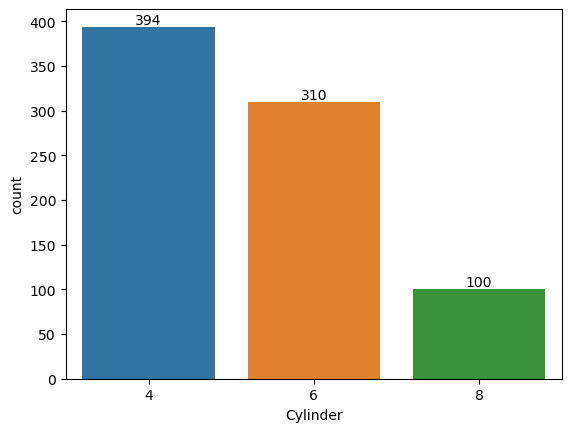

In [35]:
ax = sns.countplot(x = df["Cylinder"]);
ax.bar_label(ax.containers[0]);

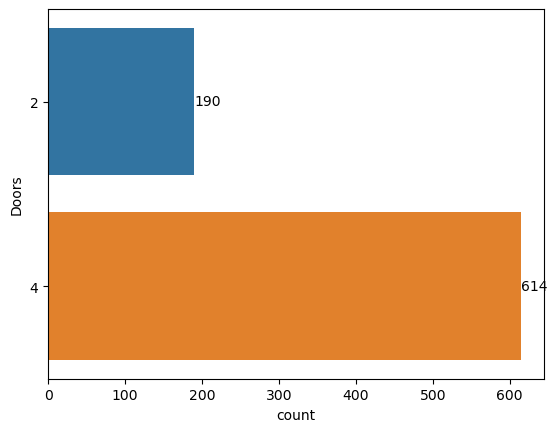

In [34]:
ay = sns.countplot(y = df["Doors"]);
ay.bar_label(ay.containers[0]);

C:\Users\admcn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


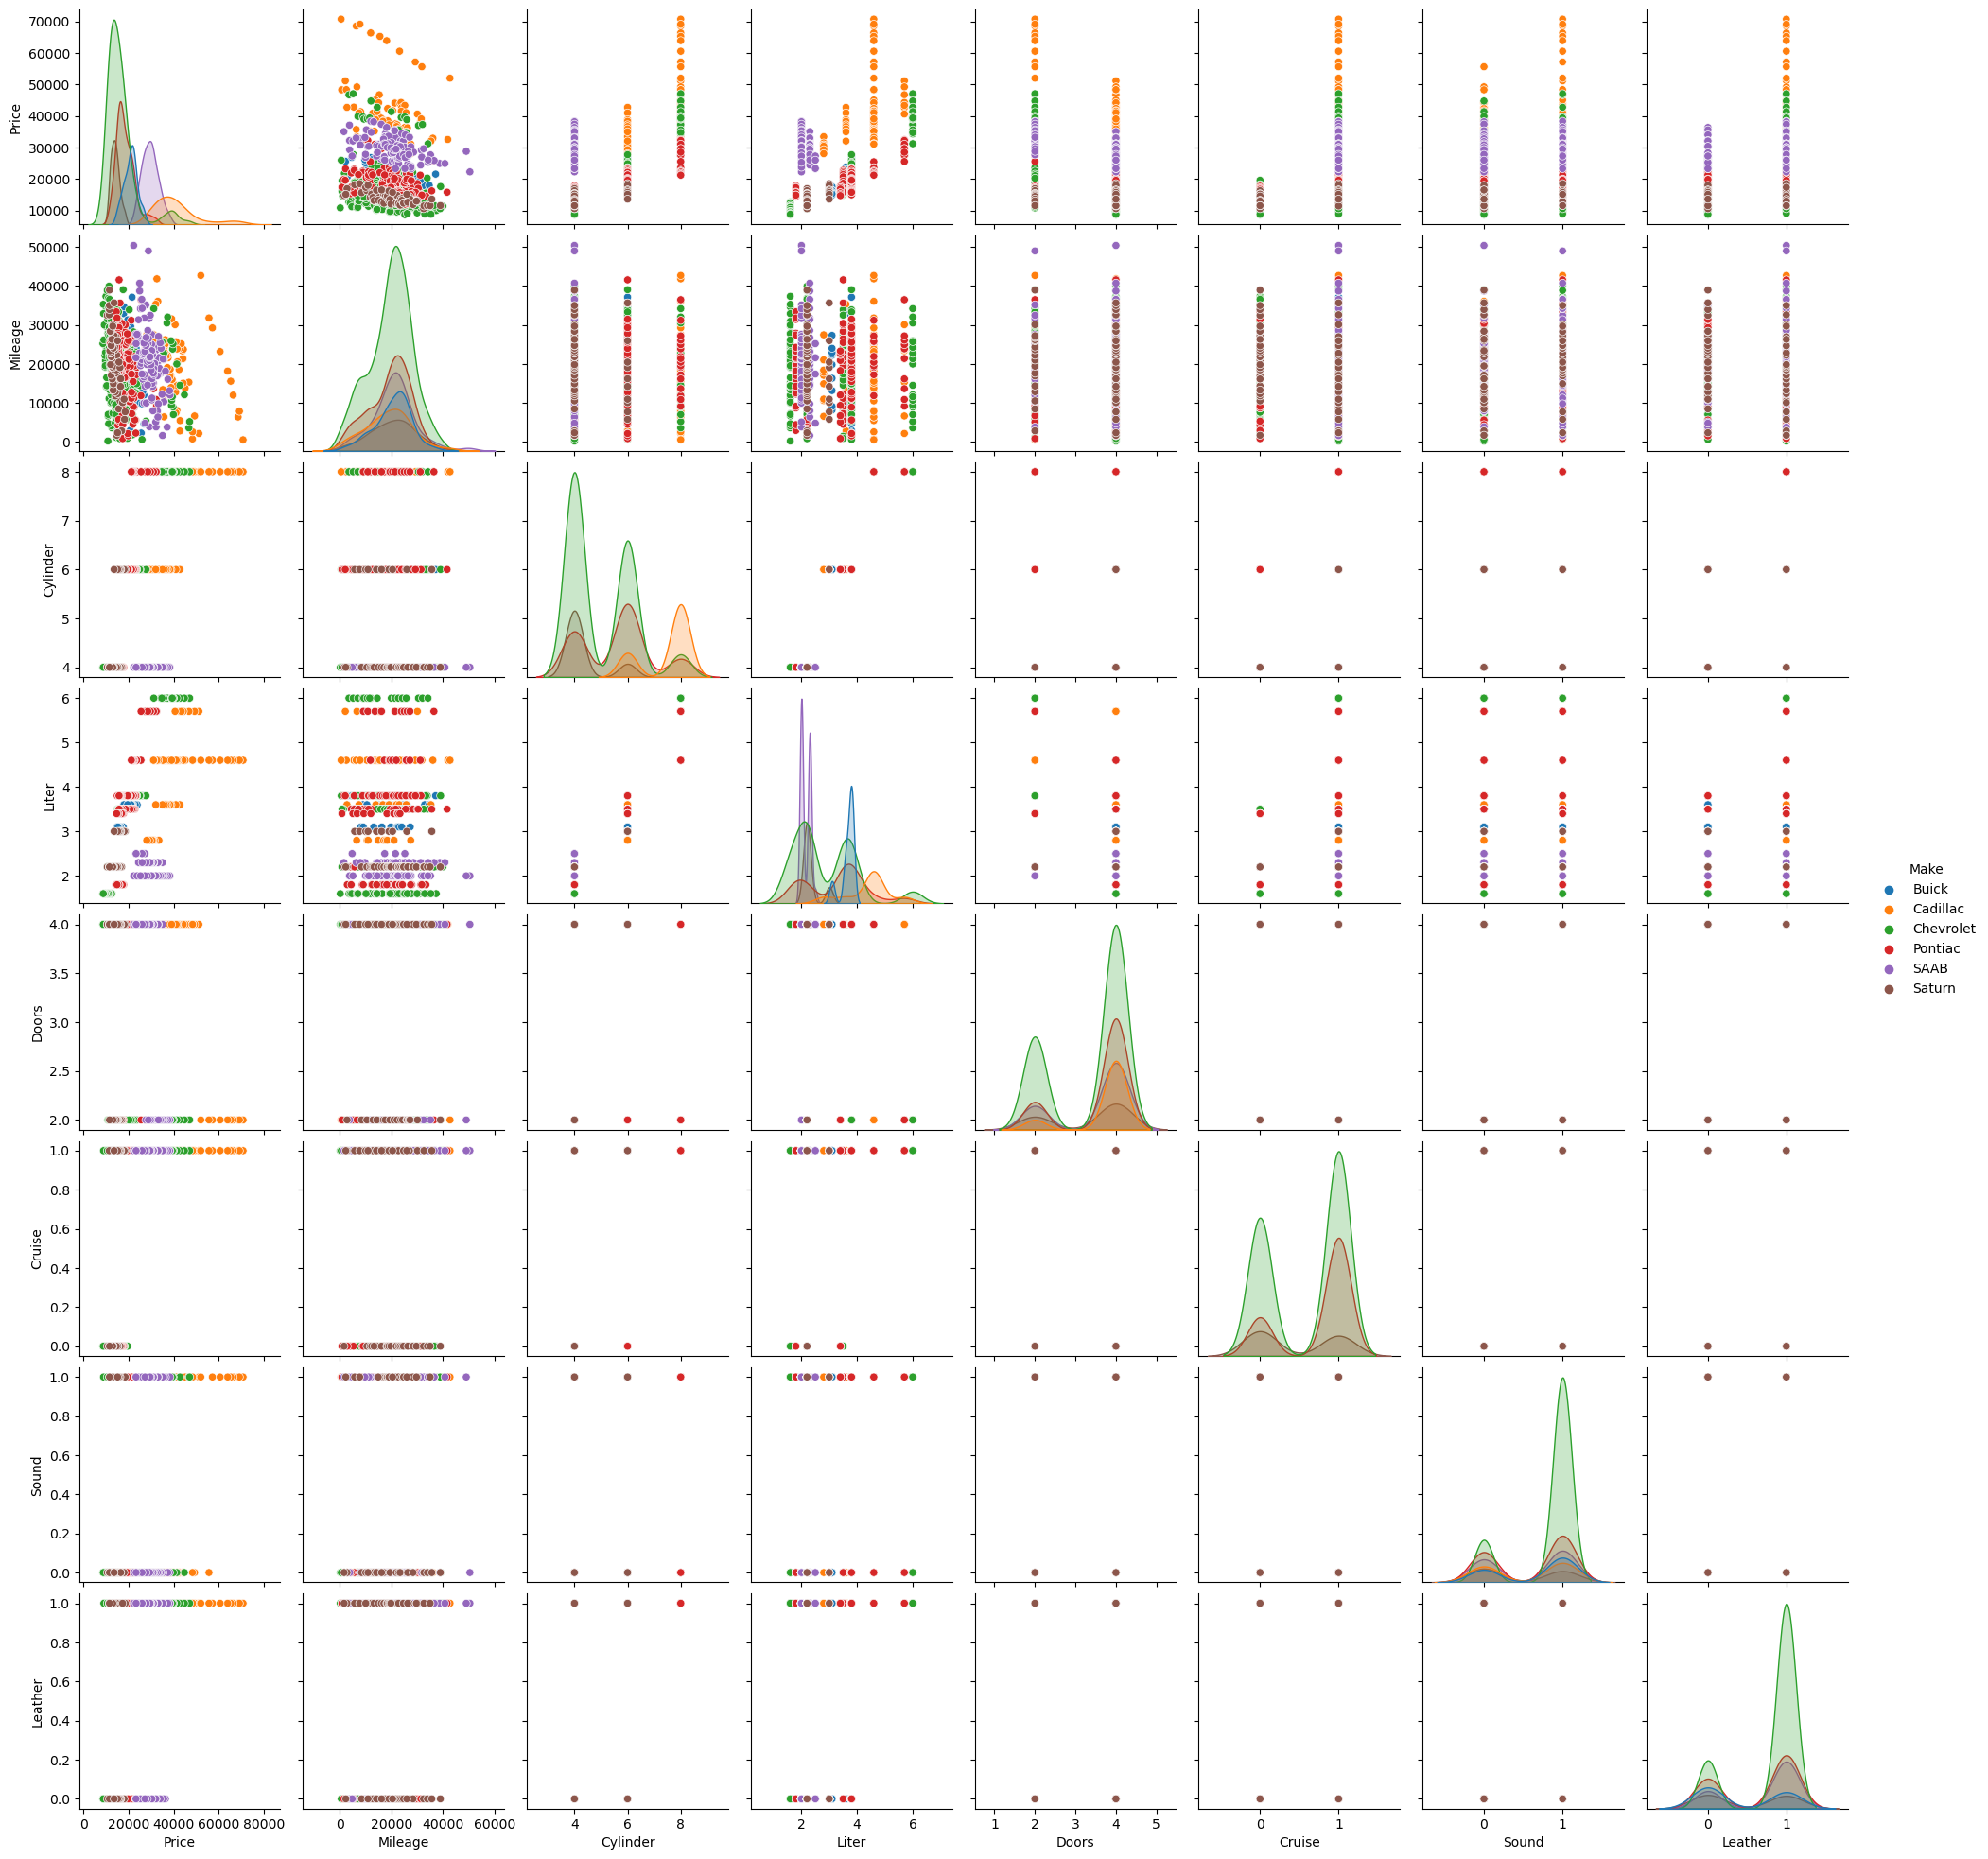

In [36]:
sns.pairplot(df, hue="Make");

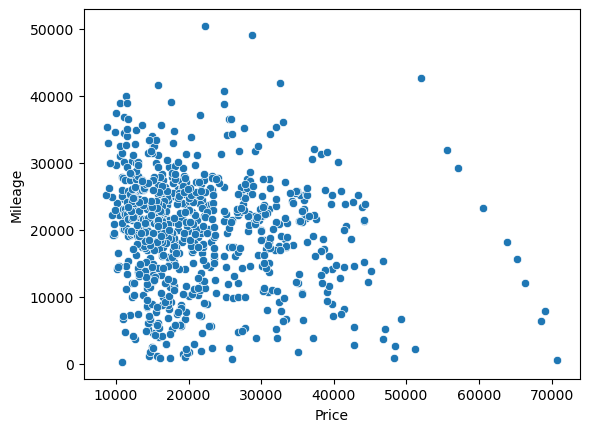

In [37]:
sns.scatterplot(x="Price", y = "Mileage", data = df);

C:\Users\admcn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


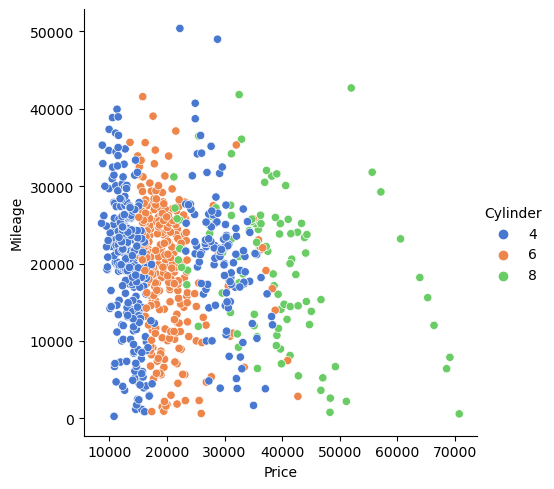

In [39]:
sns.relplot(x="Price", y = "Mileage", hue="Cylinder", palette="muted", data = df);

### P Value 

In [ ]:
#H0: There is no correlation between Price and Mileage
#H1: There is correlation between Price and Mileage
    
# p < 0.05 ---> H0 is rejected
# p > 0.05 ---> H0 is accepted

In [42]:
from scipy.stats import ttest_ind

In [43]:
_, p = ttest_ind(df["Price"], df["Mileage"])
p

0.0008662338227446262

In [ ]:
# Result: p = 0.0008662338227446262 < 0.05 --> H0 rejected and There is correlation between Price and Mileage


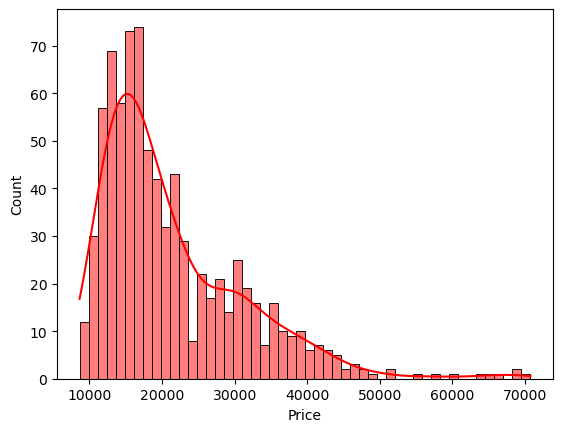

In [50]:
sns.histplot(df["Price"], kde=True, color="red", bins=50);

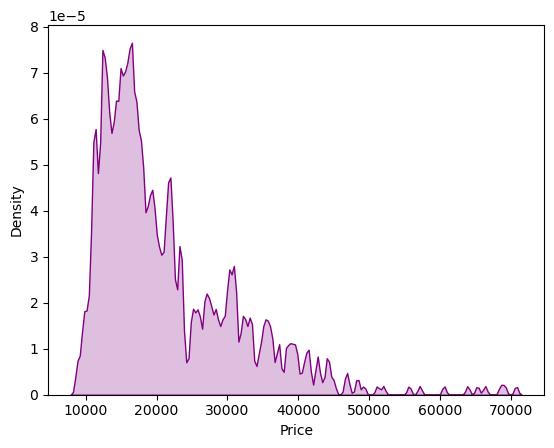

In [54]:
sns.kdeplot(df["Price"], color="purple", fill=True, bw_adjust=0.1); # bw_adjust  --> bandwidth

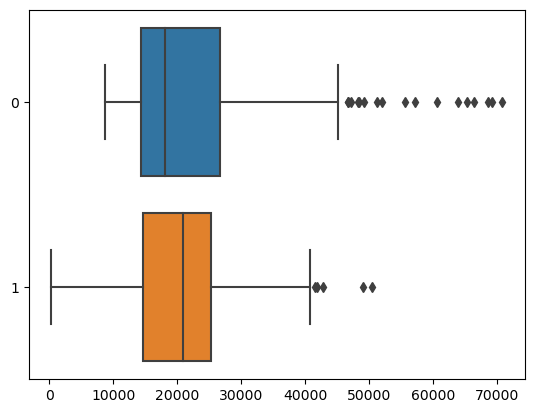

In [60]:
sns.boxplot([df["Price"], df["Mileage"]], orient="h");

<Axes: xlabel='Make', ylabel='Price'>

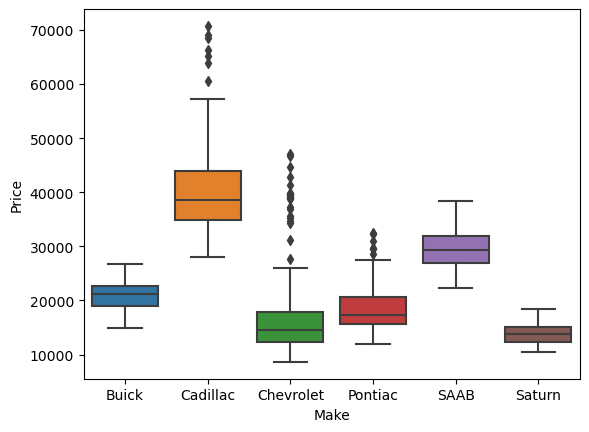

In [61]:
sns.boxplot(x="Make", y="Price", data=df)

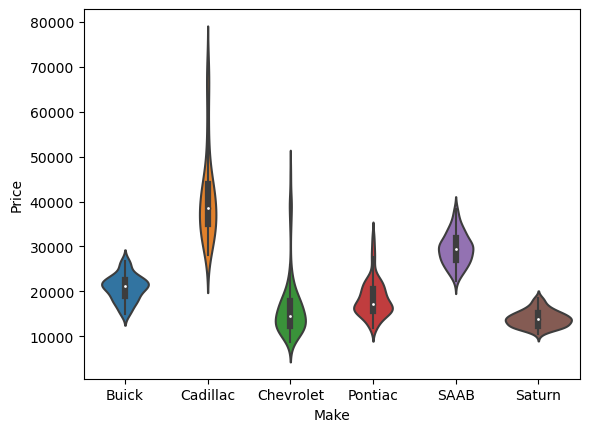

In [62]:
sns.violinplot(x="Make", y="Price", data=df);

In [72]:
!pip install plotly
import plotly.express as px

In [73]:
px.bar(df, x="Make", y="Price", color="Make");

In [74]:
px.scatter_3d(df, x="Mileage", y="Price", z="Cylinder", color="Make");

In [75]:
px.sunburst(df, path=["Make", "Model", "Trim"], values="Price");

### Feature Engineering

In [76]:
df.corr(numeric_only=True)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [78]:
abs(df.corr(numeric_only=True)["Price"].sort_values(ascending=False))

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Sound       0.124348
Doors       0.138750
Mileage     0.143051
Name: Price, dtype: float64

In [87]:
x = df[["Mileage","Cylinder","Liter","Cruise"]] # Mileage --> based on domain knowledge
y = df[["Price"]]

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [89]:
print(f"x_train shape: {x_train.shape}\nx_test shape: {x_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

x_train shape: (643, 4)
x_test shape: (161, 4)
y_train shape: (643, 1)
y_test shape: (161, 1)


### Modelling

In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train, y_train)
prediction = model.predict(x_test)

In [94]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"R2 score: {r2_score(y_test, prediction)}\nRoot Mean squared error: {mean_squared_error(y_test, prediction)**.5}") 


R2 score: 0.30711149069980004
Root Mean squared error: 7413.255792158802


we can see that the model is not good because we only added numerical values but not categorical

we will use categorical variables


In [92]:
x = df[["Mileage","Cylinder","Liter","Cruise","Make","Trim"]]
y = df[["Price"]]

In [95]:
x.head()

,Mileage,Cylinder,Liter,Cruise,Make,Trim
0,8221,6,3.1,1,Buick,Sedan 4D
1,9135,6,3.1,1,Buick,Sedan 4D
2,13196,6,3.1,1,Buick,Sedan 4D
3,16342,6,3.1,1,Buick,Sedan 4D
4,19832,6,3.1,1,Buick,Sedan 4D


In [99]:
x = pd.get_dummies(x, drop_first=True)
x.head()

,Mileage,Cylinder,Liter,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,Trim_Aero Sedan 4D,Trim_Aero Wagon 4D,Trim_Arc Conv 2D,Trim_Arc Sedan 4D,Trim_Arc Wagon 4D,Trim_CX Sedan 4D,Trim_CXL Sedan 4D,Trim_CXS Sedan 4D,Trim_Conv 2D,Trim_Coupe 2D,Trim_Custom Sedan 4D,Trim_DHS Sedan 4D,Trim_DTS Sedan 4D,Trim_GT Coupe 2D,Trim_GT Sedan 4D,Trim_GT Sportwagon,Trim_GTP Sedan 4D,Trim_GXP Sedan 4D,Trim_Hardtop Conv 2D,Trim_L300 Sedan 4D,Trim_LS Coupe 2D,Trim_LS Hatchback 4D,Trim_LS MAXX Hback 4D,Trim_LS Sedan 4D,Trim_LS Sport Coupe 2D,Trim_LS Sport Sedan 4D,Trim_LT Coupe 2D,Trim_LT Hatchback 4D,Trim_LT MAXX Hback 4D,Trim_LT Sedan 4D,Trim_Limited Sedan 4D,Trim_Linear Conv 2D,Trim_Linear Sedan 4D,Trim_Linear Wagon 4D,Trim_MAXX Hback 4D,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,8221,6,3.1,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,9135,6,3.1,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,13196,6,3.1,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,16342,6,3.1,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,19832,6,3.1,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr = LinearRegression()
model = lr.fit(x_train, y_train)
prediction = model.predict(x_test)
print(f"R2 score: {r2_score(y_test, prediction)}\nRoot Mean squared error: {mean_squared_error(y_test, prediction)**.5}") 

R2 score: 0.9707311770106378
Root Mean squared error: 1523.6314728711325


In [100]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
R = Ridge()
L = Lasso()
E = ElasticNet()

In [101]:
r_model = R.fit(x_train, y_train)
r_prediction = r_model.predict(x_test)
print(f"R2 score: {r2_score(y_test, r_prediction)}\nRoot Mean squared error: {mean_squared_error(y_test, r_prediction)**.5}")

R2 score: 0.968697381031873
Root Mean squared error: 1575.6786242840117


In [102]:
l_model = L.fit(x_train, y_train)
l_prediction = l_model.predict(x_test)
print(f"R2 score: {r2_score(y_test, l_prediction)}\nRoot Mean squared error: {mean_squared_error(y_test, l_prediction)**.5}")

R2 score: 0.9705999564419018
Root Mean squared error: 1527.043092830228


In [103]:
e_model = E.fit(x_train, y_train)
e_prediction = e_model.predict(x_test)
print(f"R2 score: {r2_score(y_test, e_prediction)}\nRoot Mean squared error: {mean_squared_error(y_test, e_prediction)**.5}")

R2 score: 0.558714578586518
Root Mean squared error: 5916.121656152222


In [104]:
# Coeeficients
lr.coef_

array([[-1.98809431e-01, -2.60219053e+03,  7.38331957e+03,
        -1.05024563e+02,  1.55364461e+04, -2.81688090e+03,
        -3.59594608e+03,  6.85100028e+03, -2.29878609e+03,
         3.90588224e+03, -2.64773527e+03, -1.26995361e+03,
         7.05993990e+03, -2.22310734e+02,  1.38127365e+02,
        -8.04390904e+03, -6.79607391e+03, -6.85437716e+03,
         3.54018314e+03, -5.72790226e+03, -1.11979437e+04,
        -8.32030557e+03, -7.59431897e+03, -8.10925499e+03,
        -6.53924263e+03, -3.82628105e+02, -5.76220228e+03,
        -3.63992297e+03,  1.67584142e+04, -5.32327214e+03,
        -7.83067529e+03, -4.64523486e+03, -7.53303979e+03,
        -6.65186020e+03, -7.63546793e+03, -6.87040602e+03,
        -6.33606759e+03, -3.92489639e+03, -7.03882417e+03,
        -6.17480932e+03, -8.14421976e+03,  4.52867027e+03,
        -2.53728086e+03, -2.10433902e+03, -7.88530569e+03,
        -6.07227049e+03, -6.65263910e+03, -5.53516395e+03,
        -4.78023915e+03, -3.13661125e+03, -6.92039280e+0

In [109]:
feature_importance=pd.DataFrame({'Feature':x_train.columns,'Coefs':lr.coef_[0]})
feature_importance

,Feature,Coefs
0,Mileage,-0.198809
1,Cylinder,-2602.190533
2,Liter,7383.319566
3,Cruise,-105.024563
4,Make_Cadillac,15536.446130
5,Make_Chevrolet,-2816.880903
6,Make_Pontiac,-3595.946075
7,Make_SAAB,6851.000276
8,Make_Saturn,-2298.786085
9,Trim_Aero Conv 2D,3905.882237


In [110]:
feature_importance = feature_importance.sort_values(by="Coefs", ascending=False)
feature_importance

,Feature,Coefs
28,Trim_Hardtop Conv 2D,16758.414214
4,Make_Cadillac,15536.446130
2,Liter,7383.319566
12,Trim_Arc Conv 2D,7059.939896
7,Make_SAAB,6851.000276
41,Trim_Linear Conv 2D,4528.670272
9,Trim_Aero Conv 2D,3905.882237
18,Trim_Conv 2D,3540.183141
14,Trim_Arc Wagon 4D,138.127365
0,Mileage,-0.198809


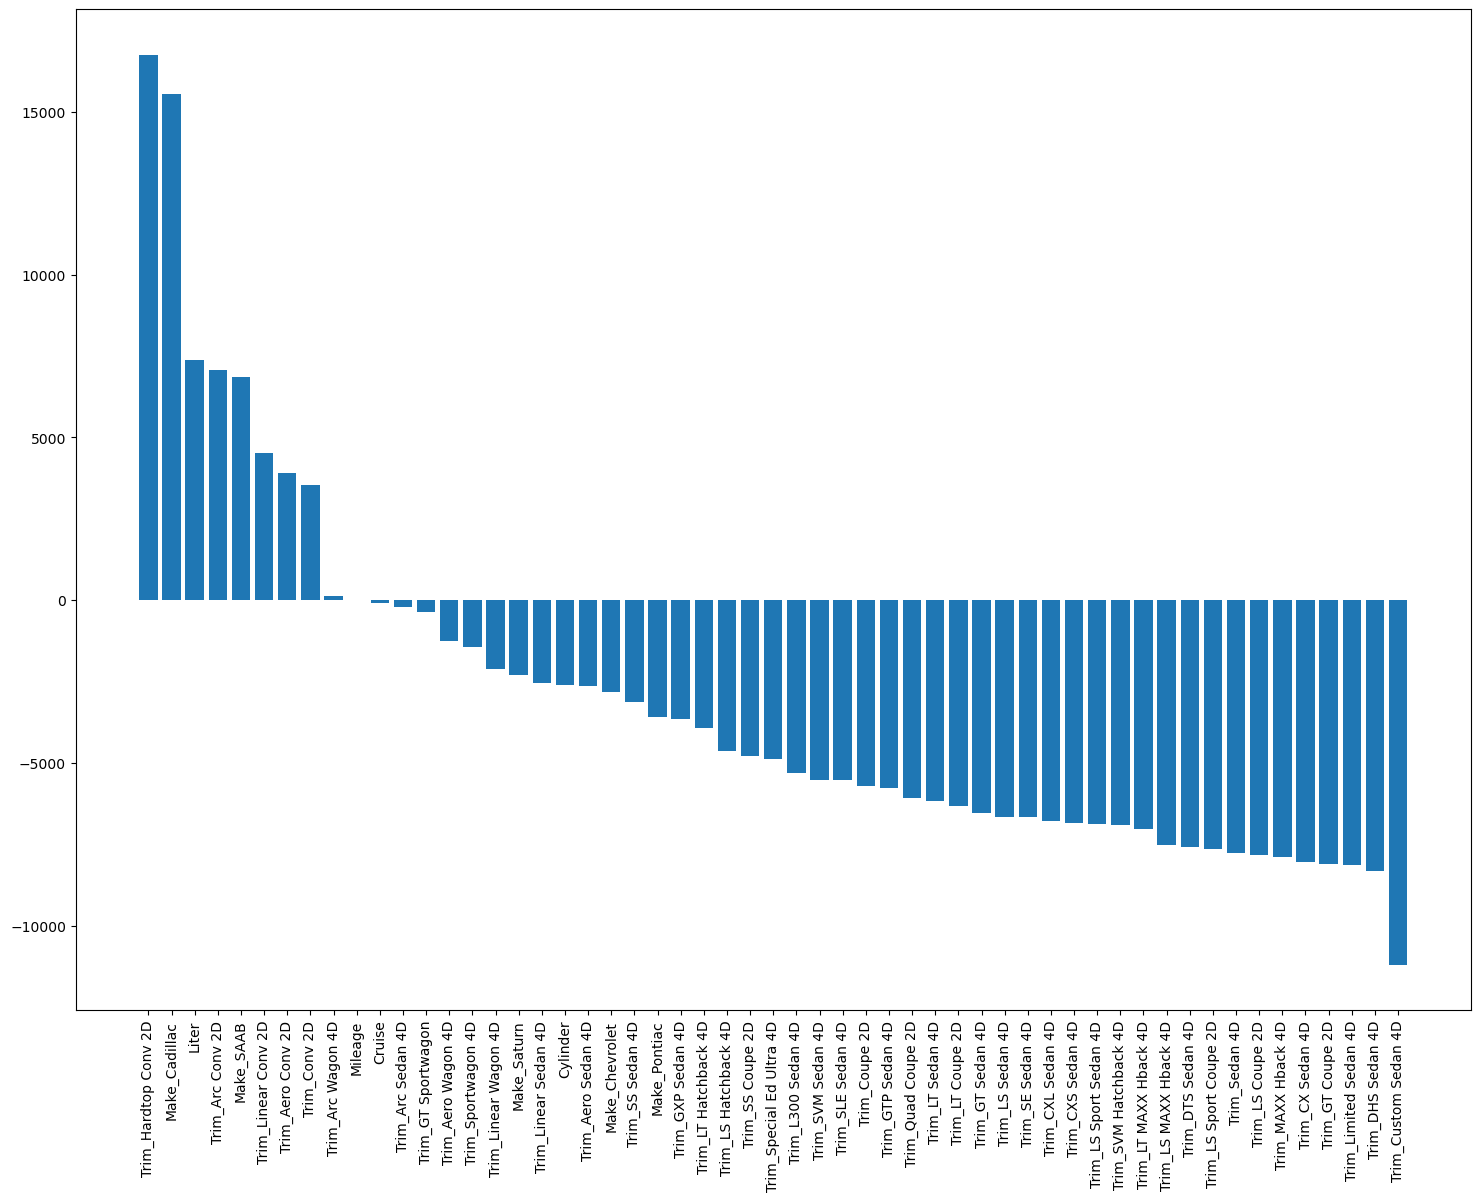

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,13))
plt.bar(feature_importance["Feature"], feature_importance["Coefs"]);
plt.xticks(rotation=90);

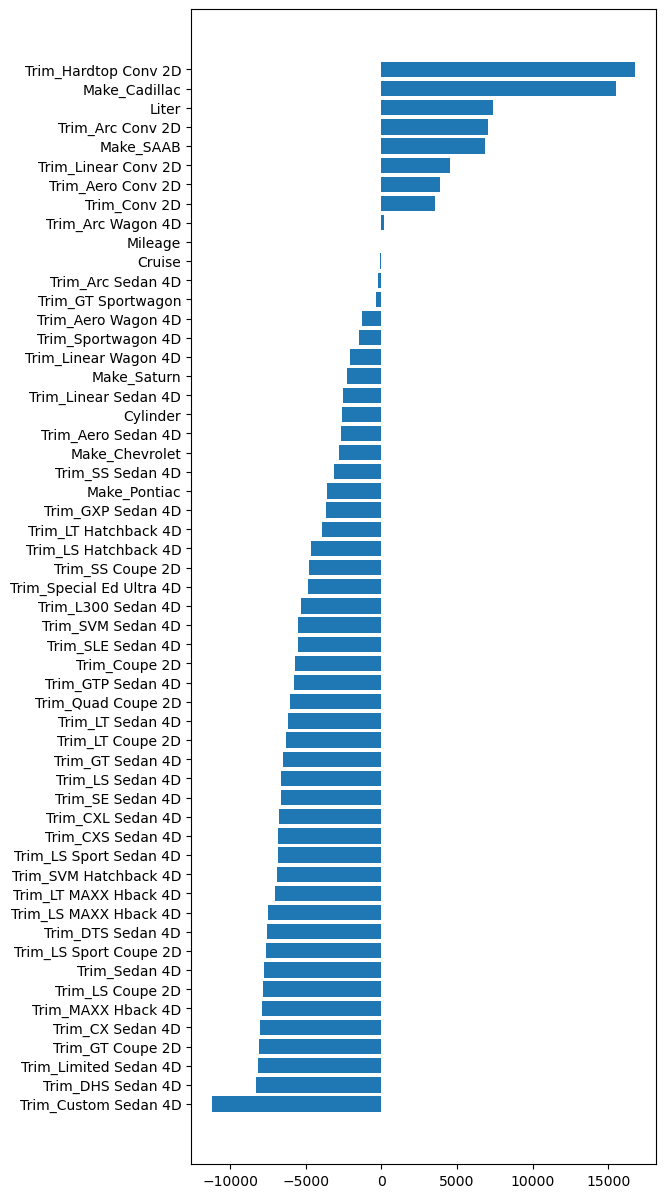

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,15))
plt.barh(feature_importance['Feature'],feature_importance['Coefs'])
plt.gca().invert_yaxis()

**Regression da bilinmesi gerekenler**
1.R2 score > 0,85
2. Root Mean squared error should be lower
3.Residuals should be normally distributed

In [115]:
residuals = prediction - y_test
residuals

,Price
192,-559.667911
717,-1027.528386
168,-1144.233441
522,-2909.433116
536,-494.086073
...,...
658,812.069687
356,-4025.396437
525,-2361.161783
748,961.806180


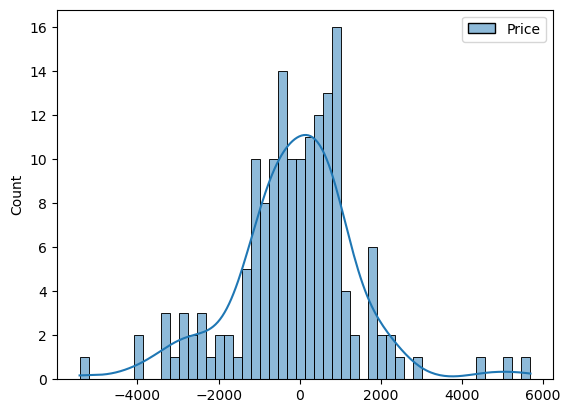

In [130]:
sns.histplot(residuals, kde=True, bins=50);

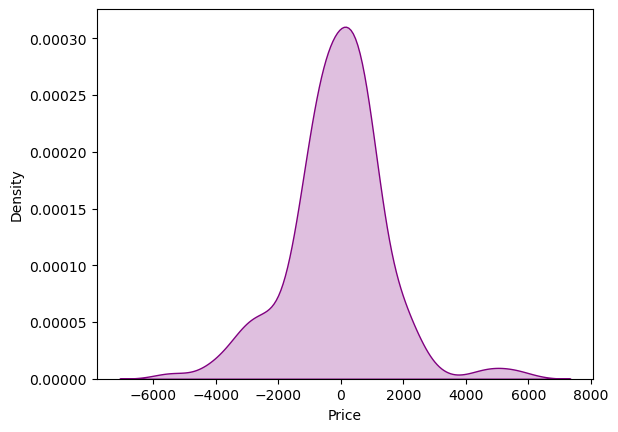

In [118]:
sns.kdeplot(x=residuals["Price"], color="purple", fill=True);

In [131]:
#test normal distribution
from scipy import stats
stats.shapiro(residuals)


ShapiroResult(statistic=0.9497789740562439, pvalue=1.625269760552328e-05)

p<.05 ----> it is not normal distribution

In [123]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
d_model = dt.fit(x_train, y_train)
d_prediction = d_model.predict(x_test)
print(f"R2 score: {r2_score(y_test, d_prediction)}\nRoot Mean squared error: {mean_squared_error(y_test, d_prediction)**.5}")

R2 score: 0.9600035475941967
Root Mean squared error: 1781.0989271829874


In [127]:
# random forest
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
rf = RandomForestRegressor()
rf_model = rf.fit(x_train, y_train)
rf_prediction = rf_model.predict(x_test)
print(f"R2 score: {r2_score(y_test, rf_prediction)}\nRoot Mean squared error: {mean_squared_error(y_test, rf_prediction)**.5}")

C:\Users\admcn\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



R2 score: 0.9780752708118122
Root Mean squared error: 1318.6951984334637


In [128]:
# ExtraTreesRegressor
et = ExtraTreesRegressor()
et_model = et.fit(x_train, y_train)
et_prediction = et_model.predict(x_test)
print(f"R2 score: {r2_score(y_test, et_prediction)}\nRoot Mean squared error: {mean_squared_error(y_test, et_prediction)**.5}")

C:\Users\admcn\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



R2 score: 0.9896807749281769
Root Mean squared error: 904.6922051955457
